# Part1: Data Preprocessing

In [ ]:
# other imports
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import seaborn as sns


from sklearn.cluster import KMeans

In [ ]:
import numpy as np
import pandas as pd

#https://data.census.gov/table?t=Poverty&g=0400000US51$0500000&tid=ACSDT1Y2019.B17002
ratio_income_poverty_2019 = pd.read_csv('/content/ACSDT1Y2019.B17002-2022-12-03T202046.csv')
ratio_income_poverty_2021 = pd.read_csv('/content/ACSDT1Y2021.B17002-2022-12-03T202010.csv')

ratio_income_poverty_2019 = ratio_income_poverty_2019.drop(ratio_income_poverty_2019.filter(regex='Margin of Error').columns, axis=1)
ratio_income_poverty_2021 = ratio_income_poverty_2021.drop(ratio_income_poverty_2021.filter(regex='Margin of Error').columns, axis=1)

ratio_income_poverty_2019 = ratio_income_poverty_2019.replace(',','', regex=True)
ratio_income_poverty_2021 = ratio_income_poverty_2021.replace(',', '', regex=True)

a = ratio_income_poverty_2019['Label (Grouping)']
ratio_income_poverty_2019=ratio_income_poverty_2019.drop('Label (Grouping)', axis=1)
ratio_income_poverty_2021=ratio_income_poverty_2021.drop('Label (Grouping)', axis=1)

ratio_income_poverty_2019 = ratio_income_poverty_2019.astype(int)
ratio_income_poverty_2021 = ratio_income_poverty_2021.astype(int)

#compute the percentages
for i in range(1, ratio_income_poverty_2019.shape[0]):
  ratio_income_poverty_2019.loc[i] = ratio_income_poverty_2019.iloc[i] / ratio_income_poverty_2019.iloc[0]
  ratio_income_poverty_2021.loc[i] = ratio_income_poverty_2021.iloc[i] / ratio_income_poverty_2021.iloc[0]

ratio_income_poverty_2019.insert(0, 'Label (Grouping)', a)
ratio_income_poverty_2021.insert(0, 'Label (Grouping)', a)

ratio_income_poverty_2021 = ratio_income_poverty_2021.drop(index=0)
ratio_income_poverty_2019 = ratio_income_poverty_2019.drop(index=0)


c = [i.split('!!')[0].strip() for i in list(ratio_income_poverty_2019.columns)]
ratio_income_poverty_2019.columns = c
ratio_income_poverty_2021.columns = c


total_2019 = ratio_income_poverty_2019
total_2021 = ratio_income_poverty_2021

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy ='median')

In [ ]:
#https://data.census.gov/table?t=Poverty&g=0400000US51$0500000&tid=ACSDP1Y2019.DP03
economic_charac_2019 = pd.read_csv('/content/ACSDP1Y2019.DP03-2022-12-03T205349.csv')
economic_charac_2021 = pd.read_csv('/content/ACSDP1Y2021.DP03-2022-12-03T205339.csv')

economic_charac_2019 = economic_charac_2019.drop(economic_charac_2019.filter(regex='Margin of Error').columns, axis=1)
economic_charac_2021 = economic_charac_2021.drop(economic_charac_2021.filter(regex='Margin of Error').columns, axis=1)
economic_charac_2019 = economic_charac_2019.drop(economic_charac_2019.filter(regex='Estimate').columns, axis=1)
economic_charac_2021 = economic_charac_2021.drop(economic_charac_2021.filter(regex='Estimate').columns, axis=1)

economic_charac_2021 = economic_charac_2021.drop(index=list(range(20))+list(range(26,29))+list(range(34,36))+list(range(49, 57))+[67,68,69,70,72,73,74,76,78]+list(range(80,104))+list(range(105,145)))
economic_charac_2019 = economic_charac_2019.drop(index=list(range(20))+list(range(26,29))+list(range(34,36))+list(range(49, 57))+[67,68,69,70,72,73,74,76,78]+list(range(80,104))+list(range(105,145)))

economic_charac_2019 = economic_charac_2019.replace('%','', regex=True)
economic_charac_2021 = economic_charac_2021.replace('%', '', regex=True)

economic_charac_2019 = economic_charac_2019.replace('N',np.nan)
economic_charac_2021 = economic_charac_2021.replace('N',np.nan)

economic_charac_2019.reset_index(drop=True, inplace=True)


a = economic_charac_2019['Label (Grouping)']
economic_charac_2019=economic_charac_2019.drop('Label (Grouping)', axis=1)
economic_charac_2021=economic_charac_2021.drop('Label (Grouping)', axis=1)

c = [i.split('!!')[0].strip() for i in list(economic_charac_2019.columns)]

#replace all missing values using median strategy
economic_charac_2019 = imputer.fit_transform(economic_charac_2019)
economic_charac_2021 = imputer.fit_transform(economic_charac_2021)

#convert np nd array back into dataframe with correct labels
economic_charac_2019 = pd.DataFrame(economic_charac_2019, columns=c)
economic_charac_2021 = pd.DataFrame(economic_charac_2021, columns=c)

#convert to decimal format
economic_charac_2019 = economic_charac_2019/100
economic_charac_2021 = economic_charac_2021/100

economic_charac_2019.insert(0, 'Label (Grouping)', a)
economic_charac_2021.insert(0, 'Label (Grouping)', a)


total_2019 = total_2019.append(economic_charac_2019, ignore_index=True)
total_2021 = total_2021.append(economic_charac_2021, ignore_index=True)

In [ ]:
#https://data.census.gov/table?t=Poverty&g=0400000US51$0500000&tid=ACSDT1Y2021.B14001
school_enroll_2019 = pd.read_csv('/content/ACSDT1Y2019.B14001-2022-12-04T221147.csv')
school_enroll_2021 = pd.read_csv('/content/ACSDT1Y2021.B14001-2022-12-04T221142.csv')
school_enroll_2021 = school_enroll_2021.iloc[[0,7,8]]
school_enroll_2019 = school_enroll_2019.iloc[[0,7,8]]

school_enroll_2019 = school_enroll_2019.filter(regex='Estimate')
school_enroll_2021 = school_enroll_2021.filter(regex='Estimate')

school_enroll_2021 = school_enroll_2021.drop('United States!!Estimate', axis=1)
school_enroll_2019 = school_enroll_2019.drop('United States!!Estimate', axis=1)

school_enroll_2019 = school_enroll_2019.replace(',','', regex=True)
school_enroll_2021 = school_enroll_2021.replace(',', '', regex=True)
school_enroll_2019 = school_enroll_2019.astype(int)
school_enroll_2021 = school_enroll_2021.astype(int)

school_enroll_2019.reset_index(drop=True, inplace=True)
school_enroll_2021.reset_index(drop=True, inplace=True)

school_enroll_2019.loc[3] = (school_enroll_2019.iloc[1] / school_enroll_2019.iloc[0]) + ( school_enroll_2019.iloc[2] / school_enroll_2019.iloc[0])
school_enroll_2021.loc[3] = (school_enroll_2021.iloc[1] / school_enroll_2021.iloc[0]) + ( school_enroll_2021.iloc[2] / school_enroll_2021.iloc[0]) 

school_enroll_2019.drop(school_enroll_2019.index[[0,1,2]], inplace=True)
school_enroll_2021.drop(school_enroll_2021.index[[0,1,2]], inplace=True)

school_enroll_2021.insert(0, 'Label (Grouping)', ['Percent enrolled in Undergrad or Grad program'])
school_enroll_2019.insert(0, 'Label (Grouping)', ['Percent enrolled in Undergrad or Grad program'])

c = [i.split('!!')[0].strip() for i in list(school_enroll_2019.columns)]
school_enroll_2019.columns = c
school_enroll_2021.columns = c

total_2019 = total_2019.append(school_enroll_2019, ignore_index=True)
total_2021 = total_2021.append(school_enroll_2021, ignore_index=True)

In [ ]:
#https://data.census.gov/table?q=employment&g=0400000US51$0500000&tid=ACSST1Y2019.S2301
employment_2019 = pd.read_csv('/content/ACSST1Y2019.S2301-2022-12-03T215710.csv')
employment_2021 = pd.read_csv('/content/ACSST1Y2021.S2301-2022-12-03T215703.csv')

employment_2019 = employment_2019.filter(regex='Unemployment rate!!Estimate')
employment_2019 = employment_2019.iloc[0]
employment_2021 = employment_2021.filter(regex='Unemployment rate!!Estimate')
employment_2021 = employment_2021.iloc[0]
employment_2019 = employment_2019.replace('%','', regex=True)
employment_2021 = employment_2021.replace('%', '', regex=True)

#only one missing value (for fauquier county) - cross checked with https://data.census.gov/table?q=employment&g=0400000US51$0500000&tid=ACSDP1Y2019.DP03
#real unemployment value is 2.5 (this approach is more accurate than using simple imputer, as only one missing value)
employment_2019 = employment_2019.replace(to_replace='N', value=2.5) 

employment_2019 = employment_2019.astype(float)
employment_2021 = employment_2021.astype(float)

#get the column names of series
c = [i.split('!!')[0].strip() for i in list(employment_2019.keys())]

employment_2019 = pd.DataFrame(list(employment_2019))
employment_2019 = employment_2019.T
employment_2019.columns = c
employment_2019 = employment_2019/100
employment_2019.insert(0, 'Label (Grouping)', ['Unemployment Rate (16 years or older)'])

employment_2021 = pd.DataFrame(list(employment_2021))
employment_2021 = employment_2021.T
employment_2021.columns = c
employment_2021 = employment_2021/100
employment_2021.insert(0, 'Label (Grouping)', ['Unemployment Rate (16 years or older)'])

total_2019 = total_2019.append(employment_2019, ignore_index=True)
total_2021 = total_2021.append(employment_2021, ignore_index=True)

In [ ]:
#https://data.census.gov/table?q=B17020:+POVERTY+STATUS+IN+THE+PAST+12+MONTHS+BY+AGE&t=Poverty&g=0400000US51$0500000&tid=ACSDT1Y2021.B17020
pov_2019 = pd.read_csv('ACSDT1Y2019.B17020-2022-12-05T050613.csv')
pov_2021 = pd.read_csv('ACSDT1Y2021.B17020-2022-12-05T050607.csv')
pov_2019 = pov_2019.drop(pov_2019.filter(regex='Margin of Error').columns, axis=1)
pov_2021 = pov_2021.drop(pov_2021.filter(regex='Margin of Error').columns, axis=1)
pov_2019 = pov_2019.replace(',','', regex=True)
pov_2021 = pov_2021.replace(',', '', regex=True)
a = ratio_income_poverty_2019['Label (Grouping)']
pov_2019=pov_2019.drop('Label (Grouping)', axis=1)
pov_2021=pov_2021.drop('Label (Grouping)', axis=1)
pov_2019 = pov_2019.astype(int)
pov_2021 = pov_2021.astype(int)

c = [i.split('!!')[0].strip() for i in list(pov_2019.columns)]
a = pov_2019.iloc[1] / pov_2019.iloc[0]
aa = pov_2021.iloc[1] / pov_2021.iloc[0]
pov_2019 = pd.DataFrame(a).T
pov_2019.columns = c
pov_2021 = pd.DataFrame(aa).T
pov_2021.columns=c

#find the change in poverty from 2019 to 2021
pov = pov_2021 - pov_2019
pov

,"Albemarle County, Virginia","Arlington County, Virginia","Augusta County, Virginia","Bedford County, Virginia","Chesterfield County, Virginia","Fairfax County, Virginia","Fauquier County, Virginia","Frederick County, Virginia","Hanover County, Virginia","Henrico County, Virginia",...,"Chesapeake city, Virginia","Hampton city, Virginia","Lynchburg city, Virginia","Newport News city, Virginia","Norfolk city, Virginia","Portsmouth city, Virginia","Richmond city, Virginia","Roanoke city, Virginia","Suffolk city, Virginia","Virginia Beach city, Virginia"
0,-0.005683,-0.001704,0.025288,-0.000694,0.009051,0.011114,0.006364,0.02975,0.032962,-0.026795,...,-0.00121,-0.029898,0.025719,0.00645,-0.032044,-0.020628,0.02219,-0.029017,0.018097,0.028659


In [ ]:
#make sure features are columns
total_2019 = total_2019.T
total_2021 = total_2021.T

In [ ]:
total_2019.columns = total_2019.iloc[0]
total_2019 = total_2019.drop(labels="Label (Grouping)")

total_2021.columns = total_2021.iloc[0]
total_2021 = total_2021.drop(labels="Label (Grouping)")

In [ ]:
for i, j in enumerate(total_2019.columns):
  print(i,j)

0     Under .50
1     .50 to .74
2     .75 to .99
3     1.00 to 1.24
4     1.25 to 1.49
5     1.50 to 1.74
6     1.75 to 1.84
7     1.85 to 1.99
8     2.00 to 2.99
9     3.00 to 3.99
10     4.00 to 4.99
11     5.00 and over
12         Management, business, science, and arts occupations
13         Service occupations
14         Sales and office occupations
15         Natural resources, construction, and maintenance occupations
16         Production, transportation, and material moving occupations
17         Agriculture, forestry, fishing and hunting, and mining
18         Construction
19         Manufacturing
20         Wholesale trade
21         Retail trade
22         Transportation and warehousing, and utilities
23         Information
24         Finance and insurance, and real estate and rental and leasing
25         Professional, scientific, and management, and administrative and waste management services
26         Educational services, and health care and social assistance
27     

In [ ]:
total_2019.head()

Label (Grouping),Under .50,.50 to .74,.75 to .99,1.00 to 1.24,1.25 to 1.49,1.50 to 1.74,1.75 to 1.84,1.85 to 1.99,2.00 to 2.99,3.00 to 3.99,...,"$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 to $149,999","$150,000 to $199,999","$200,000 or more",Percent enrolled in Undergrad or Grad program,Unemployment Rate (16 years or older)
"Albemarle County, Virginia",0.035018,0.012645,0.014485,0.028725,0.010531,0.022393,0.004737,0.031407,0.112924,0.113492,...,0.057,0.053,0.093,0.165,0.146,0.163,0.119,0.144,0.123236,0.028
"Arlington County, Virginia",0.050295,0.01449,0.021241,0.01993,0.007333,0.018572,0.014602,0.010516,0.076988,0.065779,...,0.037,0.032,0.05,0.134,0.106,0.188,0.148,0.24,0.077042,0.022
"Augusta County, Virginia",0.030801,0.00579,0.01959,0.023446,0.034045,0.040859,0.012363,0.038071,0.193541,0.208337,...,0.073,0.073,0.186,0.2,0.161,0.172,0.053,0.022,0.037611,0.03
"Bedford County, Virginia",0.032057,0.020707,0.031239,0.052291,0.051357,0.023915,0.010443,0.014865,0.145138,0.149957,...,0.069,0.101,0.129,0.164,0.165,0.162,0.066,0.067,0.050582,0.042
"Chesterfield County, Virginia",0.024248,0.025429,0.016251,0.025863,0.026786,0.047962,0.011466,0.020182,0.133452,0.159341,...,0.052,0.083,0.095,0.186,0.13,0.226,0.09,0.092,0.062907,0.043


In [ ]:
total_2021.head()

Label (Grouping),Under .50,.50 to .74,.75 to .99,1.00 to 1.24,1.25 to 1.49,1.50 to 1.74,1.75 to 1.84,1.85 to 1.99,2.00 to 2.99,3.00 to 3.99,...,"$100,000 to $149,999","$150,000 to $199,999","$200,000 or more",With Social Security,With Supplemental Security Income,With cash public assistance income,With Food Stamp/SNAP benefits in the past 12 months,With public coverage,Percent enrolled in Undergrad or Grad program,Unemployment Rate (16 years or older)
"Albemarle County, Virginia",0.023792,0.01559,0.017084,0.033642,0.030681,0.016308,0.004408,0.00755,0.133809,0.129143,...,0.177,0.136,0.155,0.343,0.021,0.013,0.02,0.281,0.131106,0.029
"Arlington County, Virginia",0.048259,0.020465,0.015598,0.01386,0.010056,0.01362,0.013023,0.009812,0.07112,0.078078,...,0.201,0.127,0.281,0.139,0.024,0.017,0.029,0.174,0.067302,0.034
"Augusta County, Virginia",0.052512,0.011391,0.017566,0.046231,0.024047,0.046324,0.023701,0.016914,0.181702,0.190498,...,0.197,0.085,0.052,0.383,0.035,0.002,0.053,0.378,0.039087,0.031
"Bedford County, Virginia",0.026559,0.042908,0.013841,0.047736,0.029194,0.024883,0.021379,0.040425,0.183318,0.194033,...,0.159,0.077,0.077,0.394,0.054,0.03,0.07,0.385,0.060124,0.027
"Chesterfield County, Virginia",0.034758,0.022339,0.017882,0.021213,0.025913,0.032507,0.013946,0.021905,0.145357,0.150223,...,0.193,0.121,0.11,0.3,0.037,0.016,0.064,0.311,0.061721,0.059


In [ ]:
#full list of features
for col in total_2021.columns:
    print(col)

    Under .50
    .50 to .74
    .75 to .99
    1.00 to 1.24
    1.25 to 1.49
    1.50 to 1.74
    1.75 to 1.84
    1.85 to 1.99
    2.00 to 2.99
    3.00 to 3.99
    4.00 to 4.99
    5.00 and over
        Car, truck, or van -- drove alone
        Car, truck, or van -- carpooled
        Public transportation (excluding taxicab)
        Walked
        Other means
        Worked from home
        Management, business, science, and arts occupations
        Service occupations
        Sales and office occupations
        Natural resources, construction, and maintenance occupations
        Production, transportation, and material moving occupations
        Agriculture, forestry, fishing and hunting, and mining
        Construction
        Manufacturing
        Wholesale trade
        Retail trade
        Transportation and warehousing, and utilities
        Information
        Finance and insurance, and real estate and rental and leasing
        Professional, scientific, and management, and

# Part 2: Data Extraction

## Delta Extraction


In [ ]:
# List of deltas we need extracted: 
# With Social Security
# With Supplemental Security Income
# with cash public assistance income
# with Food Stamp/SNAP benefits 
# with public coverage
#        Car, truck, or van -- drove alone
        # Car, truck, or van -- carpooled
        # Public transportation (excluding taxicab)
        # Walked
        # Other means
        # Worked from home

deltaSS = total_2021['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0With Social Security'] - total_2019['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0With Social Security']
deltaSSI = total_2021['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0With Supplemental Security Income'] - total_2019['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0With Supplemental Security Income']
deltaCPAI = total_2021['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0With cash public assistance income'] - total_2019['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0With cash public assistance income']
deltaSNAP = total_2021['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0With Food Stamp/SNAP benefits in the past 12 months'] - total_2019['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0With Food Stamp/SNAP benefits in the past 12 months']
deltaPC = total_2021['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0With public coverage'] - total_2019['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0With public coverage']
deltaDA = total_2021['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Car, truck, or van -- drove alone'] - total_2019['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Car, truck, or van -- drove alone']
deltaCP = total_2021['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Car, truck, or van -- carpooled'] - total_2019['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Car, truck, or van -- carpooled']
deltaPT = total_2021['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Public transportation (excluding taxicab)'] - total_2019['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Public transportation (excluding taxicab)']
deltaW = total_2021['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Walked'] - total_2019['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Walked']
deltaWFH = total_2021['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Worked from home'] - total_2019['\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Worked from home']

total_2019.drop(
    columns=[
      '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0With Social Security', 
      '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0With Supplemental Security Income', 
      '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0With cash public assistance income', 
      '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0With Food Stamp/SNAP benefits in the past 12 months', 
      '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0With public coverage', 
      '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Car, truck, or van -- drove alone',
      '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Car, truck, or van -- carpooled',
      '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Public transportation (excluding taxicab)',
      '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Walked',
      '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Other means',
      '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Worked from home',
    ], 
    inplace=True

)

total_2021.drop(
    columns=[
      '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0With Social Security', 
      '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0With Supplemental Security Income', 
      '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0With cash public assistance income', 
      '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0With Food Stamp/SNAP benefits in the past 12 months', 
      '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0With public coverage', 
      '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Car, truck, or van -- drove alone',
      '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Car, truck, or van -- carpooled',
      '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Public transportation (excluding taxicab)',
      '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Walked',
      '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Other means',
      '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Worked from home',
    ], 
    inplace=True

)


temp_delta = [
    deltaSS, 
    deltaSSI, 
    deltaCPAI, 
    deltaSNAP, 
    deltaPC, 
    deltaDA,
    deltaCP, 
    deltaPT, 
    deltaW, 
    deltaWFH,
]

print(deltaSS.shape)


DeltaDF = pd.DataFrame(temp_delta)
DeltaDF = DeltaDF.T
DeltaDF.head()


(30,)


,With Social Security,With Supplemental Security Income,With cash public assistance income,With Food Stamp/SNAP benefits in the past 12 months,With public coverage,"Car, truck, or van -- drove alone","Car, truck, or van -- carpooled",Public transportation (excluding taxicab),Walked,Worked from home
"Albemarle County, Virginia",0.003,-0.006,0.005,-0.012,0.001,-0.120,0.016,-0.031,0.004,0.125
"Arlington County, Virginia",-0.010,0.005,0.012,0.007,0.000,-0.159,-0.030,-0.233,0.001,0.427
"Augusta County, Virginia",-0.049,0.012,-0.009,-0.001,0.013,-0.070,0.014,0.007,-0.008,0.054
"Bedford County, Virginia",-0.031,0.026,0.001,-0.013,-0.017,0.662,0.025,-0.076,-0.073,0.073
"Chesterfield County, Virginia",-0.007,-0.011,0.002,0.013,0.030,-0.088,-0.058,0.002,0.000,0.155


In [ ]:
DeltaDF.shape

(30, 10)

In [ ]:
total_2019.head()

Label (Grouping),Under .50,.50 to .74,.75 to .99,1.00 to 1.24,1.25 to 1.49,1.50 to 1.74,1.75 to 1.84,1.85 to 1.99,2.00 to 2.99,3.00 to 3.99,...,"$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 to $149,999","$150,000 to $199,999","$200,000 or more",Percent enrolled in Undergrad or Grad program,Unemployment Rate (16 years or older)
"Albemarle County, Virginia",0.035018,0.012645,0.014485,0.028725,0.010531,0.022393,0.004737,0.031407,0.112924,0.113492,...,0.057,0.053,0.093,0.165,0.146,0.163,0.119,0.144,0.123236,0.028
"Arlington County, Virginia",0.050295,0.01449,0.021241,0.01993,0.007333,0.018572,0.014602,0.010516,0.076988,0.065779,...,0.037,0.032,0.05,0.134,0.106,0.188,0.148,0.24,0.077042,0.022
"Augusta County, Virginia",0.030801,0.00579,0.01959,0.023446,0.034045,0.040859,0.012363,0.038071,0.193541,0.208337,...,0.073,0.073,0.186,0.2,0.161,0.172,0.053,0.022,0.037611,0.03
"Bedford County, Virginia",0.032057,0.020707,0.031239,0.052291,0.051357,0.023915,0.010443,0.014865,0.145138,0.149957,...,0.069,0.101,0.129,0.164,0.165,0.162,0.066,0.067,0.050582,0.042
"Chesterfield County, Virginia",0.024248,0.025429,0.016251,0.025863,0.026786,0.047962,0.011466,0.020182,0.133452,0.159341,...,0.052,0.083,0.095,0.186,0.13,0.226,0.09,0.092,0.062907,0.043


## Doing some basic data visualization

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

dataset = total_2019.values
  
for k in K:
    # Building and fitting the model

    kmeanModel = KMeans(n_clusters=k).fit(dataset)
    kmeanModel.fit(dataset)

    inertias.append(kmeanModel.inertia_)

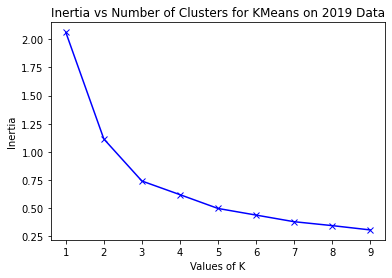

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters for KMeans on 2019 Data')
plt.show()

Looking at the above graph between 3 nodes seems like the optimal number of nodes, "the elbow"

The best way to do what I want below is to create a matrix of height the number of counties and then add whatever to that. 

In [ ]:
# extracting the clsuter centers: 

kmeanModel2019 = KMeans(n_clusters=3).fit(dataset)
kmeanModel2019.fit(dataset)
print(kmeanModel2019.cluster_centers_)

method1_2019_cluster_centers = kmeanModel2019.cluster_centers_
y_pred2019 = kmeanModel2019.fit_predict(dataset)
print(y_pred2019)

[[0.0755875  0.02905127 0.04471285 0.04019807 0.04777598 0.04374247
  0.01740046 0.02942296 0.17308857 0.156122   0.10979621 0.23310165
  0.37081818 0.18309091 0.20854545 0.09345455 0.14390909 0.01027273
  0.06772727 0.10736364 0.01981818 0.12309091 0.056      0.01254545
  0.04909091 0.09681818 0.26172727 0.09427273 0.05181818 0.04972727
  0.07436364 0.04636364 0.086      0.09254545 0.14727273 0.19281818
  0.139      0.126      0.04990909 0.046      0.10936867 0.04545455]
 [0.03105208 0.01339386 0.02065462 0.02321836 0.02611689 0.03288591
  0.01220891 0.01879268 0.13192926 0.14700944 0.1258532  0.41688479
  0.45266667 0.15606667 0.207      0.0834     0.10073333 0.00693333
  0.07126667 0.061      0.02046667 0.10893333 0.0534     0.01333333
  0.0658     0.1316     0.24253333 0.08513333 0.04806667 0.09193333
  0.03086667 0.0236     0.05466667 0.05986667 0.09093333 0.16346667
  0.14613333 0.21406667 0.10773333 0.10906667 0.06503197 0.0396    ]
 [0.03503363 0.00997239 0.02046531 0.01737788 

## Method 1 Vector Extraction 

In [ ]:
# extracting clusters via method 1 (simply compute means for the same points on the other side)

dataset2021 = total_2021.values
method1_2021_cluster_centers = []

for i in range(3): 
  method1_2021_cluster_centers.append(np.mean(dataset2021[y_pred2019 == 0, :], axis=0))

method1_2021_cluster_centers = np.asarray(method1_2021_cluster_centers)

print(method1_2021_cluster_centers)

[[0.03300513209498223 0.016632302290658253 0.025430024161914724
  0.021267167130645005 0.028623377865297648 0.026981607594358883
  0.011249327462217051 0.019411110499395107 0.13935846821828457
  0.14087856603708018 0.12131581530647553 0.4158471013386908
  0.47506666666666675 0.1514 0.19680000000000003 0.07966666666666665
  0.0972 0.008066666666666668 0.06806666666666666 0.06973333333333334
  0.02126666666666667 0.09786666666666667 0.04966666666666667
  0.015133333333333332 0.06673333333333334 0.1510666666666667
  0.2400666666666667 0.07600000000000001 0.050600000000000006
  0.08580000000000002 0.037200000000000004 0.019600000000000003 0.0502
  0.0586 0.08466666666666668 0.1592666666666667 0.13246666666666665
  0.2086 0.117 0.132 0.06630505704313917 0.0446]
 [0.03300513209498223 0.016632302290658253 0.025430024161914724
  0.021267167130645005 0.028623377865297648 0.026981607594358883
  0.011249327462217051 0.019411110499395107 0.13935846821828457
  0.14087856603708018 0.1213158153064755

In [ ]:
# here are the vectors that we will correlate against: 

method1_vectors = []

for i in y_pred2019:
  method1_vectors.append(method1_2021_cluster_centers[i] - method1_2019_cluster_centers[i])

method1_vectors = np.asarray(method1_vectors)

print(method1_vectors) 

[[-0.04258237000912946 -0.012418963747173703 -0.01928283013812457 ...
  0.08600000000000001 -0.043063608494017094 -0.000854545454545455]
 [-0.0020284962276083465 0.006659912620526492 0.0049647120302468845 ...
  -0.13924999999999998 -0.004490863148897906 0.016350000000000003]
 [0.0019530519923554347 0.0032384375379884145 0.004775399804401101 ...
  0.022933333333333333 0.0012730896999853664 0.0049999999999999975]
 ...
 [0.0019530519923554347 0.0032384375379884145 0.004775399804401101 ...
  0.022933333333333333 0.0012730896999853664 0.0049999999999999975]
 [-0.04258237000912946 -0.012418963747173703 -0.01928283013812457 ...
  0.08600000000000001 -0.043063608494017094 -0.000854545454545455]
 [-0.04258237000912946 -0.012418963747173703 -0.01928283013812457 ...
  0.08600000000000001 -0.043063608494017094 -0.000854545454545455]]


## Method 2 Vector Extraction



In [ ]:
# extracting clusters via method 2 (re-cluster on the other side and then try to map cluster differences to the delta vectors)
# we want to see the difference in the cluster centers

kmeanModel2021 = KMeans(n_clusters=3).fit(dataset2021)
kmeanModel2021.fit(dataset)
method2_2021_cluster_centers = kmeanModel2021.cluster_centers_
print(kmeanModel2021.cluster_centers_)
y_pred2021 = kmeanModel2021.fit_predict(dataset)
print(y_pred2021)


[[0.03105208 0.01339386 0.02065462 0.02321836 0.02611689 0.03288591
  0.01220891 0.01879268 0.13192926 0.14700944 0.1258532  0.41688479
  0.45266667 0.15606667 0.207      0.0834     0.10073333 0.00693333
  0.07126667 0.061      0.02046667 0.10893333 0.0534     0.01333333
  0.0658     0.1316     0.24253333 0.08513333 0.04806667 0.09193333
  0.03086667 0.0236     0.05466667 0.05986667 0.09093333 0.16346667
  0.14613333 0.21406667 0.10773333 0.10906667 0.06503197 0.0396    ]
 [0.0755875  0.02905127 0.04471285 0.04019807 0.04777598 0.04374247
  0.01740046 0.02942296 0.17308857 0.156122   0.10979621 0.23310165
  0.37081818 0.18309091 0.20854545 0.09345455 0.14390909 0.01027273
  0.06772727 0.10736364 0.01981818 0.12309091 0.056      0.01254545
  0.04909091 0.09681818 0.26172727 0.09427273 0.05181818 0.04972727
  0.07436364 0.04636364 0.086      0.09254545 0.14727273 0.19281818
  0.139      0.126      0.04990909 0.046      0.10936867 0.04545455]
 [0.03503363 0.00997239 0.02046531 0.01737788 

In [ ]:
# here are the vectors that we will correlate against: 

method2_vectors = []

for i in range(len(y_pred2019)):
  method2_vectors.append(method2_2021_cluster_centers[y_pred2021[i]] - method1_2019_cluster_centers[y_pred2019[i]])

method2_vectors = np.asarray(method2_vectors)

print(method2_vectors)


[[-0.04055387 -0.01907888 -0.02424754 ...  0.22525    -0.03857275
  -0.01720455]
 [ 0.04055387  0.01907888  0.02424754 ... -0.22525     0.03857275
   0.01720455]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.04055387 -0.01907888 -0.02424754 ...  0.22525    -0.03857275
  -0.01720455]
 [-0.04055387 -0.01907888 -0.02424754 ...  0.22525    -0.03857275
  -0.01720455]]


## Method 3 Vector Extraction

In [ ]:
# method 3 vectors

method3_vectors = []

for i in range(len(dataset)): 
  method3_vectors.append(dataset2021[i] - dataset[i])

method3_vectors = np.asarray(method3_vectors)

print(method3_vectors)

[[-0.011226849886477756 0.0029445456965670174 0.0025993192592329416 ...
  0.010999999999999982 0.007869793853394896 0.0010000000000000009]
 [-0.002035987815298297 0.00597461492250656 -0.005642717224435679 ...
  0.041000000000000036 -0.009739825240809574 0.012]
 [0.021710843079014847 0.005601012794148319 -0.002024229894760015 ...
  0.030000000000000002 0.0014765467165602578 0.0010000000000000009]
 ...
 [0.017090028499108345 0.006115289793388025 -0.05222205900846136 ...
  -0.013999999999999999 0.006103738700038275 0.018000000000000002]
 [0.008005179887685093 0.011473622722690894 -0.0013813391272300413 ...
  0.019000000000000003 -0.003774453878796928 -0.005999999999999998]
 [0.007999586823765694 0.007714698996353145 0.012944984740869518 ...
  0.012999999999999998 -0.011479802341143916 0.0]]


# Part 3: Regression

## Method 1

In [ ]:
model_method1 = sklearn.linear_model.LinearRegression()
model_method1.fit(DeltaDF, method1_vectors)
y_pred = model_method1.predict(DeltaDF)
print(np.sqrt(sklearn.metrics.mean_squared_error(method1_vectors, y_pred)))

0.021540139463393306


In [ ]:
DeltaDF.head()

,With Social Security,With Supplemental Security Income,With cash public assistance income,With Food Stamp/SNAP benefits in the past 12 months,With public coverage,"Car, truck, or van -- drove alone","Car, truck, or van -- carpooled",Public transportation (excluding taxicab),Walked,Worked from home
"Albemarle County, Virginia",0.003,-0.006,0.005,-0.012,0.001,-0.120,0.016,-0.031,0.004,0.125
"Arlington County, Virginia",-0.010,0.005,0.012,0.007,0.000,-0.159,-0.030,-0.233,0.001,0.427
"Augusta County, Virginia",-0.049,0.012,-0.009,-0.001,0.013,-0.070,0.014,0.007,-0.008,0.054
"Bedford County, Virginia",-0.031,0.026,0.001,-0.013,-0.017,0.662,0.025,-0.076,-0.073,0.073
"Chesterfield County, Virginia",-0.007,-0.011,0.002,0.013,0.030,-0.088,-0.058,0.002,0.000,0.155


In [ ]:
np.sum(np.abs(model_method1.coef_), axis=0)

array([ 9.8362468 , 13.85757023, 18.9743589 , 17.27535018, 11.72853834,
        2.14327345,  6.98167574,  5.3390921 , 16.55474433,  4.18901182])

## Method 2

In [ ]:
model_method2 = sklearn.linear_model.LinearRegression()
model_method2.fit(DeltaDF, method2_vectors)
y_pred = model_method2.predict(DeltaDF)
print(np.sqrt(sklearn.metrics.mean_squared_error(method2_vectors, y_pred)))

0.045311785113557046


## Method 3

In [ ]:
model_method3 = sklearn.linear_model.LinearRegression()
model_method3.fit(DeltaDF, method3_vectors)
y_pred = model_method3.predict(DeltaDF)
print(np.sqrt(sklearn.metrics.mean_squared_error(method3_vectors, y_pred)))

0.015360496061434123


## Checking Delta Against Poverty

In [ ]:
pov = pov.T
pov.columns = ["% change in population beneath poverty line"]
pov.head()

,% change in population beneath poverty line
"Albemarle County, Virginia",-0.005683
"Arlington County, Virginia",-0.001704
"Augusta County, Virginia",0.025288
"Bedford County, Virginia",-0.000694
"Chesterfield County, Virginia",0.009051


In [ ]:
model_method4 = sklearn.linear_model.LinearRegression()
model_method4.fit(DeltaDF, pov)
y_pred = model_method4.predict(DeltaDF)
print(np.sqrt(sklearn.metrics.mean_squared_error(pov, y_pred)))

0.02004246053630852


In [ ]:
for i, j in zip(list(DeltaDF.columns), model_method4.coef_.T):
  print(i,j)

        With Social Security [-0.03485268]
        With Supplemental Security Income [-0.17297681]
        With cash public assistance income [-0.0741448]
        With Food Stamp/SNAP benefits in the past 12 months [-0.14512797]
            With public coverage [0.09376985]
        Car, truck, or van -- drove alone [0.06152856]
        Car, truck, or van -- carpooled [0.03359168]
        Public transportation (excluding taxicab) [0.15205978]
        Walked [0.27976711]
        Worked from home [0.11934018]


This shows that the lowest correlated attributes were Supplemental Security Income, Food Stamp/SNAP benefits, Cash Public Assistance and Social Security.

# Part 4: Data Visualization

## Method 1

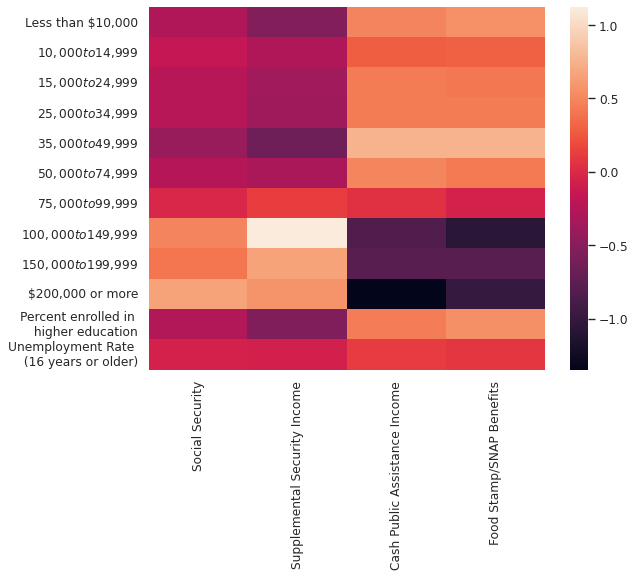

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
sns.set()

labels = ['Social Security', 'Supplemental Security Income', 'Cash Public Assistance Income', 'Food Stamp/SNAP Benefits' ]
ytick = [i.strip() for i in list(total_2019.columns[30:])]
ytick[1] = '$10,000 to $14,999'
ytick[10] = 'Percent enrolled in \n higher education'
ytick[11] = 'Unemployment Rate \n (16 years or older)'

ax = sns.heatmap(model_method1.coef_[30:, 0:4],
                 xticklabels = labels, 
                 yticklabels = ytick)
plt.show()

## Method 2

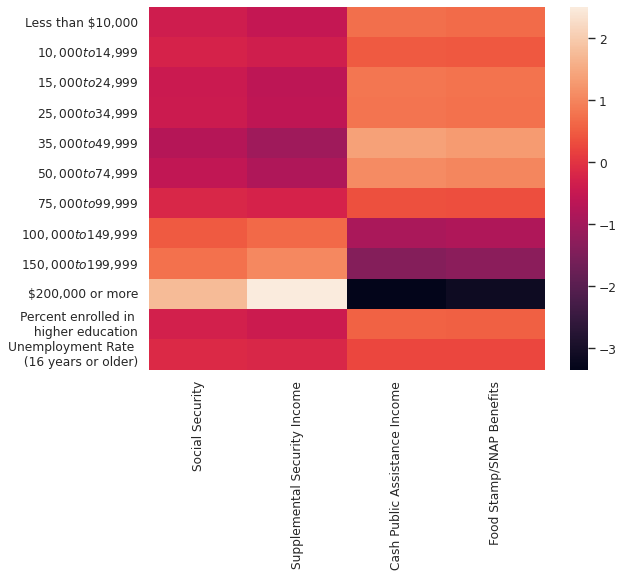

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
sns.set()
ax = sns.heatmap(model_method2.coef_[30:, 0:4],
                 xticklabels = labels, 
                 yticklabels = ytick)
plt.show()

## Method 3: 

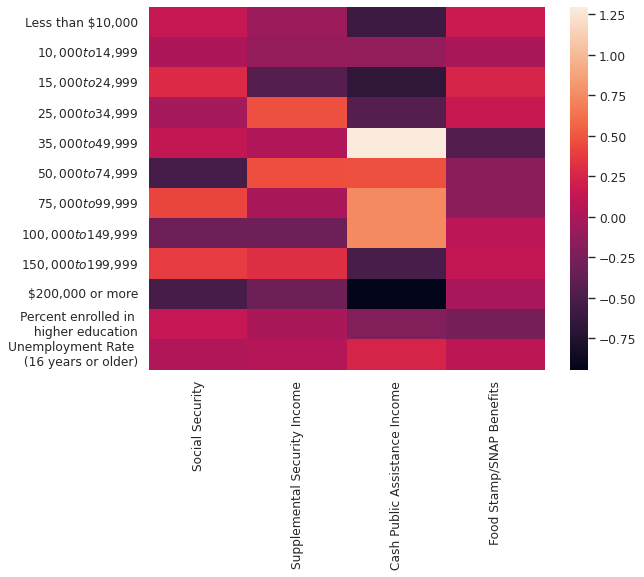

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
sns.set()
ax = sns.heatmap(model_method3.coef_[30:, 0:4],
                 xticklabels = labels, 
                 yticklabels = ytick)
plt.show()

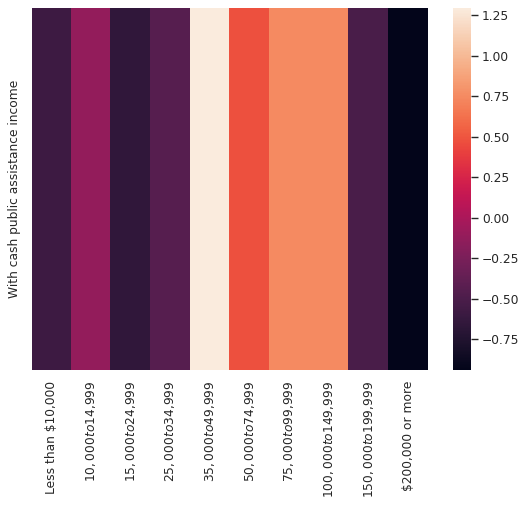

In [ ]:
# extracting stimmy band

from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
sns.set()
ax = sns.heatmap([model_method3.coef_[30:40, 2]], 
                 xticklabels=ytick[:10], 
                 yticklabels=['With cash public assistance income'])
plt.show()

## Method 4: 

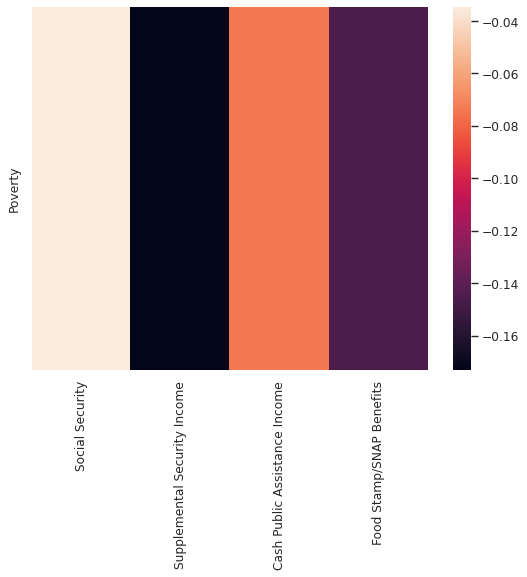

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
sns.set()
ax = sns.heatmap(model_method4.coef_[:, :4],
                 xticklabels = labels,
                  yticklabels = ["Poverty"],
)
plt.show()